In [1]:
%matplotlib inline
import pystokes, numpy as np, matplotlib.pyplot as plt

In [6]:
# particle radius, self-propulsion speed, number and fluid viscosity
b, vs, Np, eta = 1.0, 0.4, 1, 0.1

rbm     = pystokes.interface.Rbm(radius=b, particles=Np, viscosity=eta)
forces  = pystokes.forceFields.Forces(particles=Np)

In [7]:
2**10

1024

In [99]:
def oneBodySim(T=1):
    """simulation of two active colloid near a wall in a fluid at temperature T"""
    
    #initial position and orientation
    r0, p0 = np.array([0, 0, 2.5]), np.array([1.0, 0, 0])
    
    # integration parameters and arrays
    Nt=2**10; r=np.zeros(3*Nt); p=np.zeros(3*Nt)
    r[0:3] = r0; p[0:3] = p0;  dt=0.01;  sqdt=np.sqrt(T*dt)
    F = np.zeros(3*Np);  v = np.zeros(3*Np); vv = np.zeros(3*Np)
    F0 = 6*np.pi*eta*b*vs*(1+9*b/(8*r[2])); #active stall force

    # integration loop
    for i in range(Nt-1):
        forces.lennardJones(F,r0, lje=.6,ljr=2.1); F[2]=F0
        rbm.mobilityTT(v, r0, F, ll=10)  
                
        # Euler-Maryuama integration
        rbm.noiseTT(vv, r)
        r[3*(i+1)] = r[3*i] + dt*v[0] + sqdt*vv[0]
        r[3*(i+1)+Np] = r[3*i+Np] + dt*v[Np] + sqdt*vv[Np]
        r[3*(i+1)+2*Np] = r[3*i+2*Np] + dt*v[2*Np] + sqdt*vv[2*Np] #not working yet, indexing wrong

        #reset the variables for next time step
        r0[0]=r[3*(i+1)]
        r0[Np]=r[3*(i+1)+Np]
        r0[2*Np]=r[3*(i+1)+2*Np]
        v,vv,F[0:3] = v*0,vv*0,F[0:3]*0        
    return r

In [100]:
r = oneBodySim(T=1)

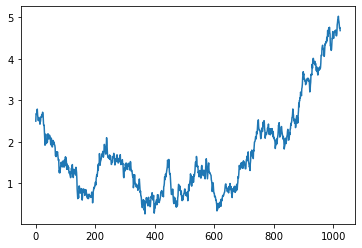

In [101]:
plt.plot(r[2::3])

In [102]:
r[0:3]

array([0. , 0. , 2.5])

In [103]:
r.shape

(3072,)

In [104]:
2**10

1024